In [1]:
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cross_validation import train_test_split

C:\Users\johng\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
elite_reviews = pd.read_csv('elite_reviews_scores.csv')

In [4]:
row_reviews = pd.read_csv('row_reviews_scores.csv')

C:\Users\johng\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
elite_reviews['review_length'] = elite_reviews['text'].apply(lambda x: len(x))

In [14]:
elite_reviews['review_length'].describe()

count    502414.000000
mean        911.852948
std         689.880236
min           4.000000
25%         438.000000
50%         736.000000
75%        1179.000000
max        5228.000000
Name: review_length, dtype: float64

In [15]:
row_reviews['review_length'] = row_reviews['text'].apply(lambda x: len(x))

In [16]:
row_reviews['review_length'].describe()

count    1.240789e+06
mean     5.530695e+02
std      5.382027e+02
min      1.000000e+00
25%      2.160000e+02
50%      3.820000e+02
75%      6.910000e+02
max      5.155000e+03
Name: review_length, dtype: float64

The first quartile, median, and third quartile of the length of the reviews for elite users are all roughly twice as long as the other users reviews.

In [11]:
elite_reviews.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years,Positive,Negative,Neutral,Compound,review_length
0,0,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,6,0.289,0.041,0.671,0.9400,246
1,1,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,6,0.139,0.045,0.817,0.8639,603
2,2,FunI9om-aK5oMIIJmhMlZA,u0LXt3Uea_GidxRW1xcsfg,0W4lkclzZThpx3V65bVgig,4,2011-09-28,a must stop when you are in montreal!\r\n\r\nI...,0,0,0,6,0.190,0.032,0.778,0.9551,424
3,3,K7o5jDInfmX3cY5oH6ATNw,u0LXt3Uea_GidxRW1xcsfg,oWTn2IzrprsRkPfULtjZtQ,3,2012-09-23,Came here for a burger as one of my friends sa...,4,0,0,6,0.208,0.048,0.745,0.8529,309
4,4,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,6,0.111,0.096,0.793,0.4985,1050


In [148]:
elite_reviews = elite_reviews[elite_reviews['review_length'] >= 750]

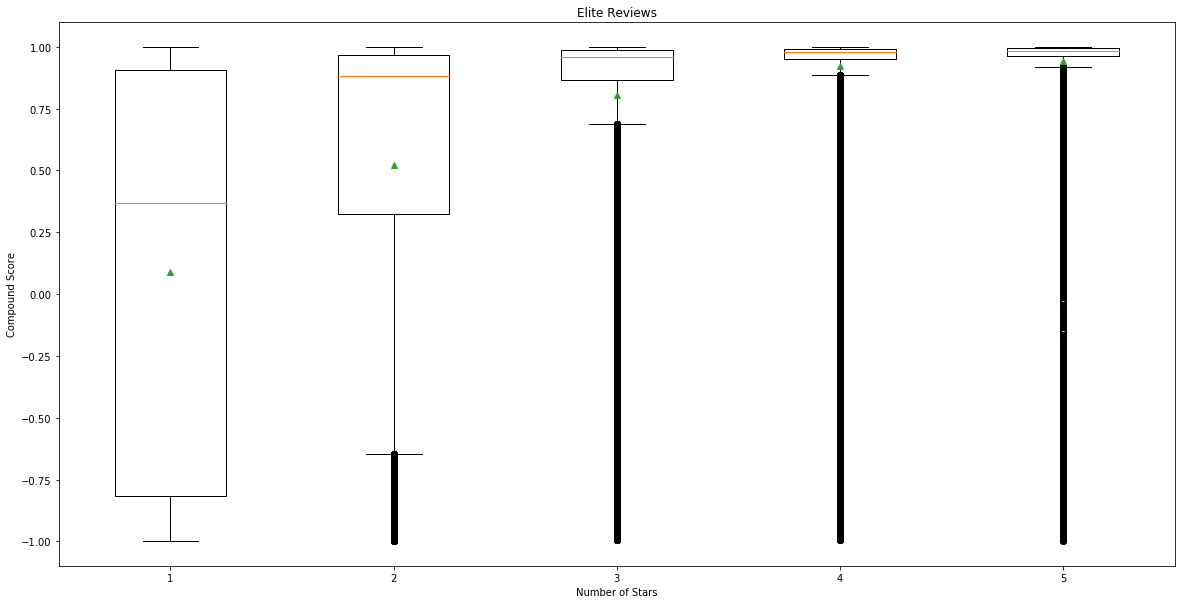

In [22]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('Elite Reviews')
plt.xlabel('Number of Stars')
plt.ylabel('Compound Score')
plt.savefig('eliteboxplot.png')
plt.show()

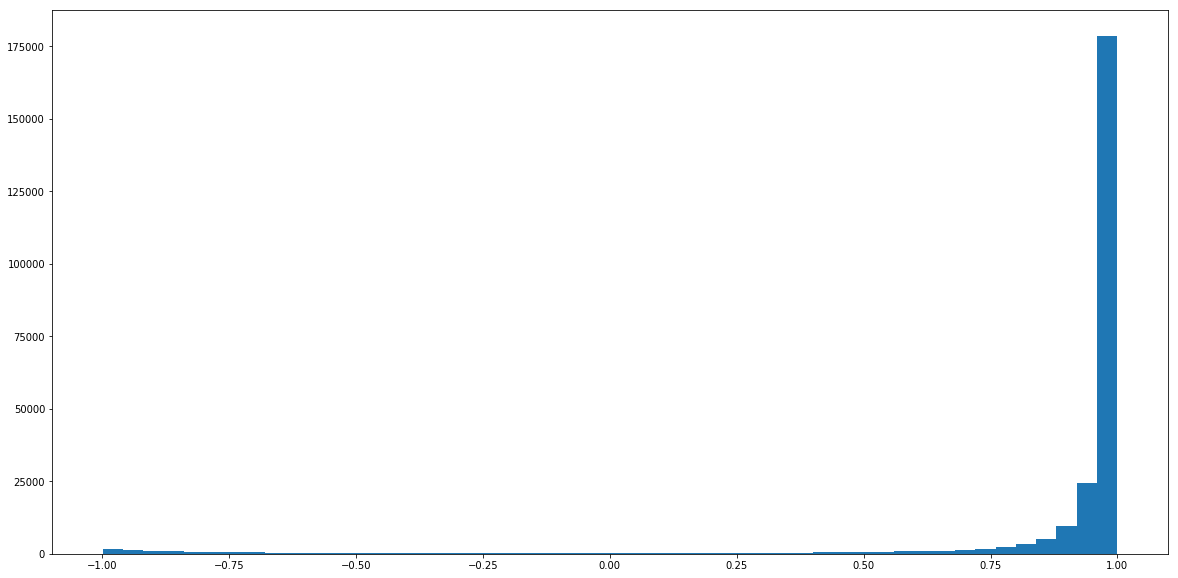

In [149]:
plt.figure(figsize=(20,10))
plt.hist(elite_reviews['Compound'], bins = 50)
plt.show()

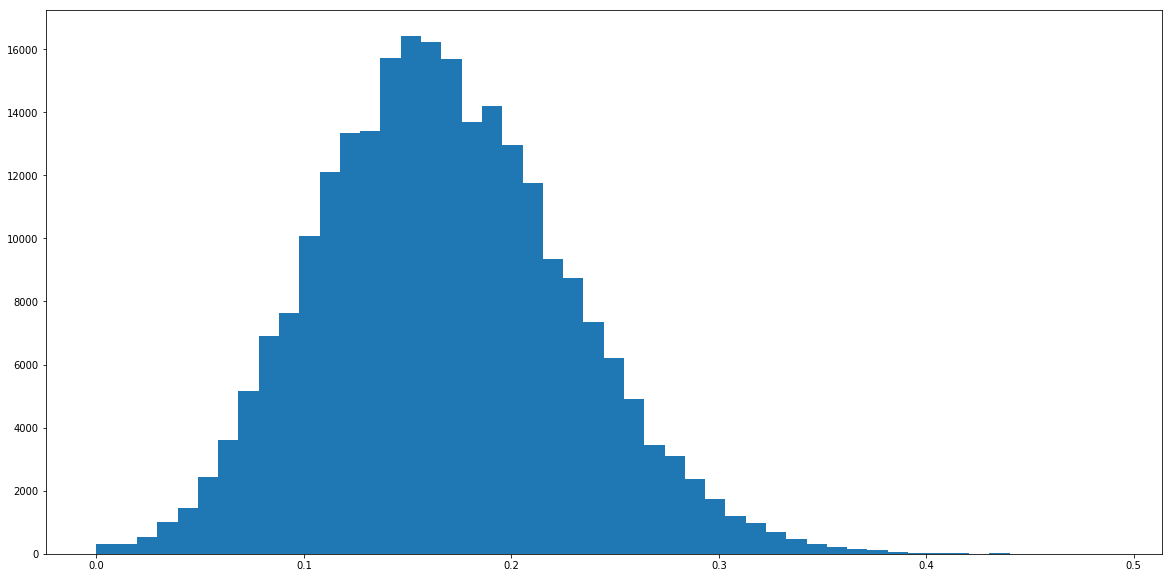

In [150]:
plt.figure(figsize=(20,10))
plt.hist(elite_reviews['Positive'], bins = 50)
plt.show()

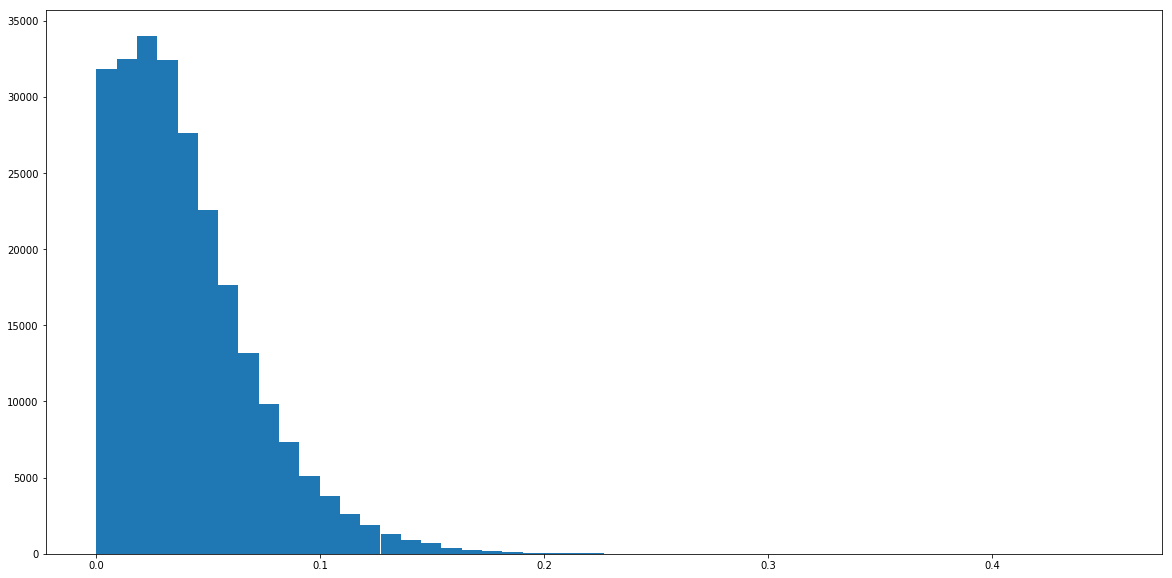

In [151]:
plt.figure(figsize=(20,10))
plt.hist(elite_reviews['Negative'], bins = 50)
plt.show()

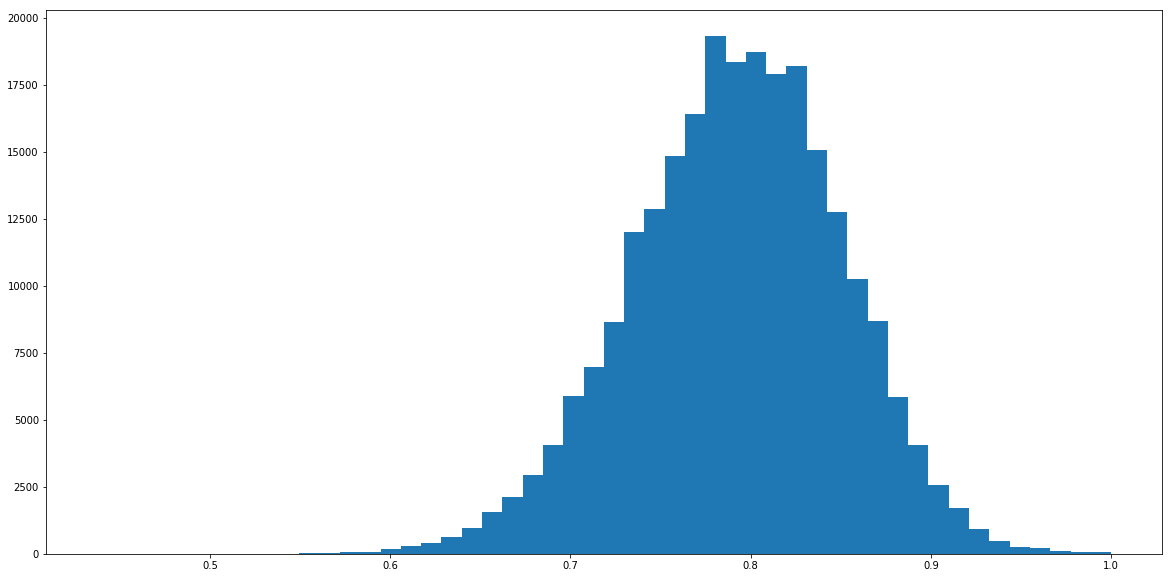

In [152]:
plt.figure(figsize=(20,10))
plt.hist(elite_reviews['Neutral'], bins = 50)
plt.show()

In [153]:
stars1 = elite_reviews[elite_reviews['stars'] == 1]['Positive']
stars2 = elite_reviews[elite_reviews['stars'] == 2]['Positive']
stars3 = elite_reviews[elite_reviews['stars'] == 3]['Positive']
stars4 = elite_reviews[elite_reviews['stars'] == 4]['Positive']
stars5 = elite_reviews[elite_reviews['stars'] == 5]['Positive']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

In [154]:
stats.f_oneway(stars4,stars5) #stars1,stars2,stars3,

F_onewayResult(statistic=2254.9920476273865, pvalue=0.0)

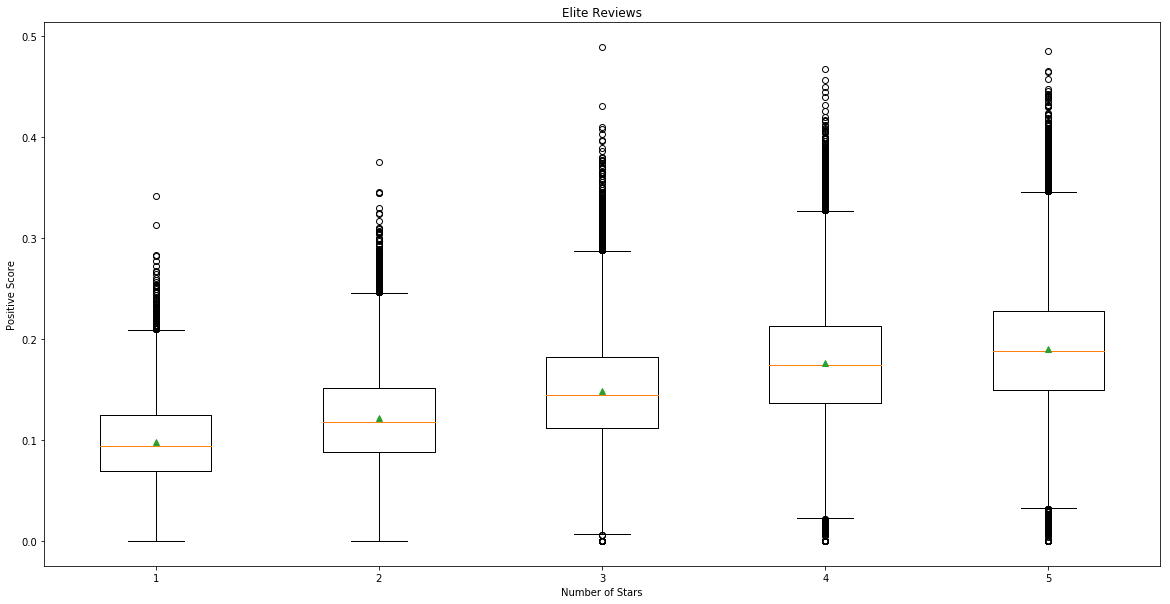

In [155]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('Elite Reviews')
plt.xlabel('Number of Stars')
plt.ylabel('Positive Score')
plt.savefig('eliteboxplot.png')
plt.show()

In [156]:
stars1 = elite_reviews[elite_reviews['stars'] == 1]['Neutral']
stars2 = elite_reviews[elite_reviews['stars'] == 2]['Neutral']
stars3 = elite_reviews[elite_reviews['stars'] == 3]['Neutral']
stars4 = elite_reviews[elite_reviews['stars'] == 4]['Neutral']
stars5 = elite_reviews[elite_reviews['stars'] == 5]['Neutral']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

In [157]:
stats.f_oneway(stars1,stars2,stars3,stars4,stars5)

F_onewayResult(statistic=2093.2404268295513, pvalue=0.0)

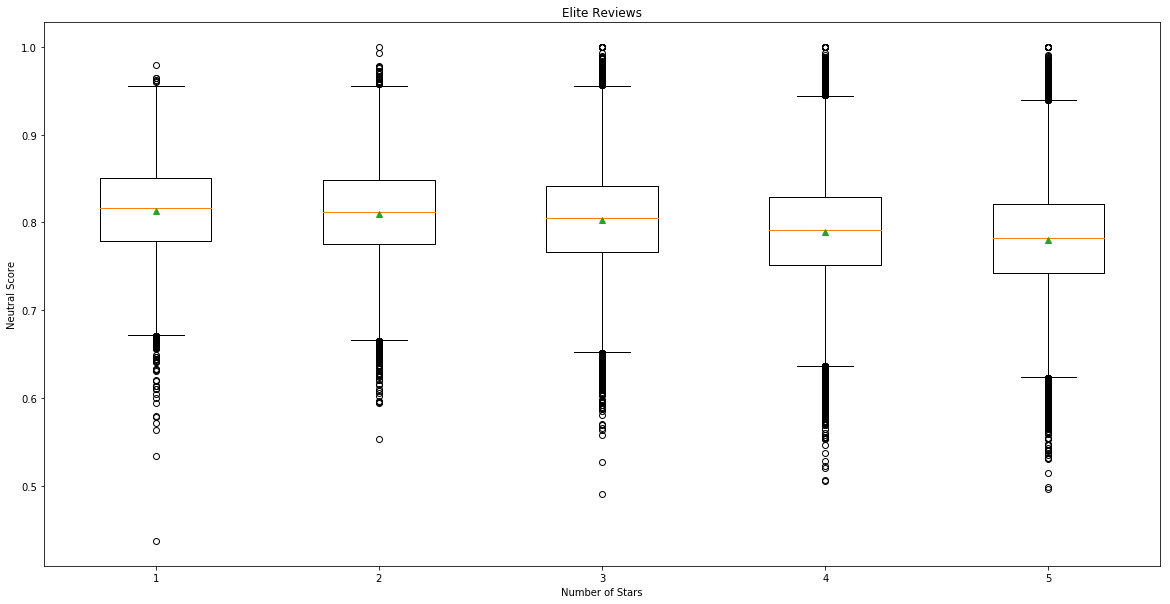

In [158]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('Elite Reviews')
plt.xlabel('Number of Stars')
plt.ylabel('Neutral Score')
plt.savefig('eliteboxplot.png')
plt.show()

In [41]:
elite_reviews.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years,Positive,Negative,Neutral,Compound,review_length
1,1,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,6,0.139,0.045,0.817,0.8639,603
4,4,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,6,0.111,0.096,0.793,0.4985,1050
5,5,HSR2RLOifd0cvSNVqGXkMQ,u0LXt3Uea_GidxRW1xcsfg,28adZ4lsuUeVB2aWzohK9g,3,2012-10-19,was always intrigued of this place when I pass...,1,0,0,6,0.124,0.033,0.843,0.9706,1347
11,11,EKAN4jw3LsE3631feSaA_g,u0LXt3Uea_GidxRW1xcsfg,pZ1quwXnYozLIZIVABojhw,4,2012-09-23,My boyfriend took me here for my birthday. At ...,0,0,0,6,0.249,0.014,0.736,0.9973,1433
12,12,51TLGhFncBnppaBN5vHlcw,u0LXt3Uea_GidxRW1xcsfg,Uq-GOs9_IqweUsB5MdII9w,4,2014-08-21,OMG - came here with some friends for Brunch a...,0,0,0,6,0.097,0.014,0.889,0.9233,930


In [159]:
x_pos = elite_reviews.iloc[:,11].values
x_neg = elite_reviews.iloc[:,12].values
x_neu = elite_reviews.iloc[:,13].values
x_comp = elite_reviews.iloc[:,14].values
y = elite_reviews.iloc[:,4].values

#### Test all 4 sentiment scores

In [160]:
X = elite_reviews.iloc[:,11:15].values
X

array([[0.111 , 0.096 , 0.793 , 0.4985],
       [0.124 , 0.033 , 0.843 , 0.9706],
       [0.249 , 0.014 , 0.736 , 0.9973],
       ...,
       [0.146 , 0.011 , 0.844 , 0.9521],
       [0.217 , 0.053 , 0.73  , 0.9886],
       [0.153 , 0.043 , 0.804 , 0.9833]])

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [162]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 8.055e+05
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:12:19   Log-Likelihood:            -2.2478e+05
No. Observations:              172535   AIC:                         4.496e+05
Df Residuals:                  172531   BIC:                         4.496e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.6239      0.037    206.313      0.0

In [163]:
y_pred = est2.predict(X_test)
r_squared = r2_score(y_test, y_pred)
r_squared

0.269549211585585

#### Remove compound from model

In [164]:
X = elite_reviews.iloc[:,11:14].values
X

array([[0.111, 0.096, 0.793],
       [0.124, 0.033, 0.843],
       [0.249, 0.014, 0.736],
       ...,
       [0.146, 0.011, 0.844],
       [0.217, 0.053, 0.73 ],
       [0.153, 0.043, 0.804]])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [166]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.064e+06
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:12:28   Log-Likelihood:            -2.2553e+05
No. Observations:              172535   AIC:                         4.511e+05
Df Residuals:                  172532   BIC:                         4.511e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.4308      0.031    274.455      0.0

In [167]:
y_pred = est2.predict(X_test)
r_squared = r2_score(y_test, y_pred)
r_squared

0.26250696469349544

#### Model only pos and neu

In [168]:
X = np.concatenate((x_pos.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)
X

array([[0.111, 0.793],
       [0.124, 0.843],
       [0.249, 0.736],
       ...,
       [0.146, 0.844],
       [0.217, 0.73 ],
       [0.153, 0.804]])

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [170]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.469e+06
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:13:13   Log-Likelihood:            -2.3231e+05
No. Observations:              172535   AIC:                         4.646e+05
Df Residuals:                  172533   BIC:                         4.646e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.9843      0.032    284.498      0.0

In [171]:
y_pred = est2.predict(X_test)
r_squared = r2_score(y_test, y_pred)
r_squared

0.20166957466842783

#### Model only compound

In [172]:
X = x_comp
X

array([0.4985, 0.9706, 0.9973, ..., 0.9521, 0.9886, 0.9833])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [174]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 1.044e+06
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:13:24   Log-Likelihood:            -3.1331e+05
No. Observations:              172535   AIC:                         6.266e+05
Df Residuals:                  172534   BIC:                         6.266e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8630      0.004   1021.711      0.0

In [175]:
y_pred = est2.predict(X_test)
r_squared = r2_score(y_test, y_pred)
r_squared

-1.0262386503363214

## Average scores for each business

In [176]:
avg_elite_reviews = pd.DataFrame(elite_reviews.groupby('business_id')[['stars','Positive','Negative','Neutral','Compound']].mean())
avg_elite_reviews

,stars,Positive,Negative,Neutral,Compound
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.164794,0.193202,0.035547,0.771262,0.937330
--cZ6Hhc9F7VkKXxHMVZSQ,3.723404,0.167191,0.031532,0.801277,0.913183
-050d_XIor1NpCuWkbIVaQ,4.039370,0.164236,0.036646,0.799244,0.929657
-0qht1roIqleKiQkBLDkbw,3.343750,0.143250,0.051187,0.805469,0.766722
-1UMR00eXtwaeh59pEiDjA,3.619048,0.151429,0.040619,0.807952,0.866371
-1xuC540Nycht_iWFeJ-dw,4.236364,0.140455,0.043218,0.816345,0.791236
-2ToCaDFpTNmmg3QFzxcWg,2.230769,0.081538,0.058115,0.860346,0.339654
-3zffZUHoY8bQjGfPSoBKQ,4.041096,0.176253,0.030822,0.792945,0.916788
-4TMQnQJW1yd6NqGRDvAeA,4.190476,0.206286,0.032643,0.761143,0.986131


Text(0,0.5,'Number of Stars')

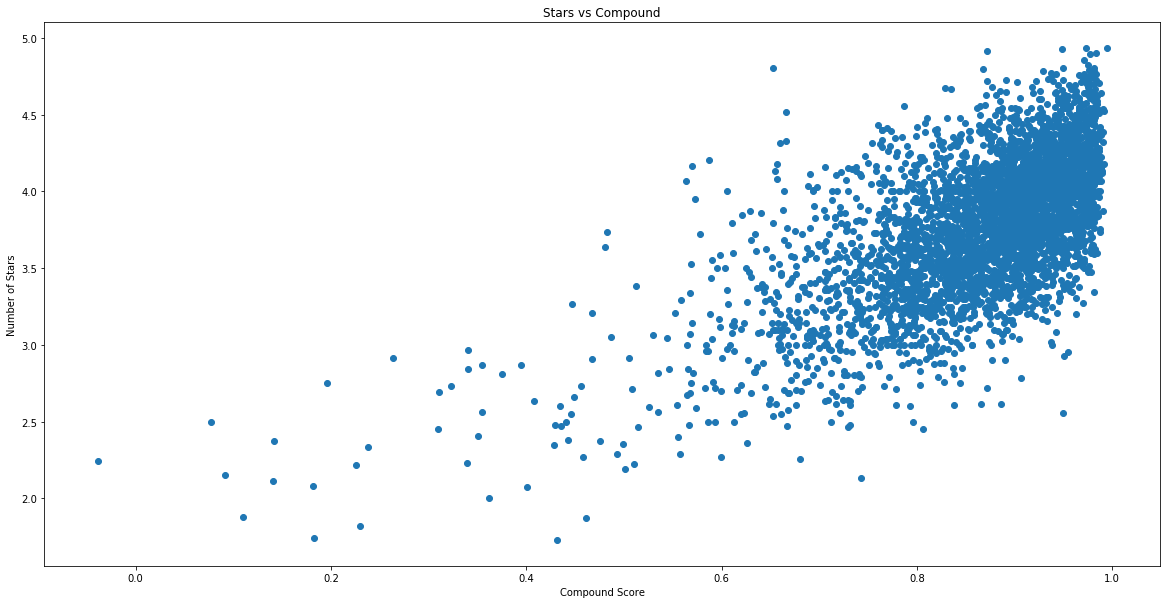

In [194]:
plt.figure(figsize=(20,10))
plt.scatter(avg_elite_reviews['Compound'], avg_elite_reviews['stars'])
plt.title('Stars vs Compound')
plt.xlabel('Compound Score')
plt.ylabel('Number of Stars')

Text(0,0.5,'Number of Stars')

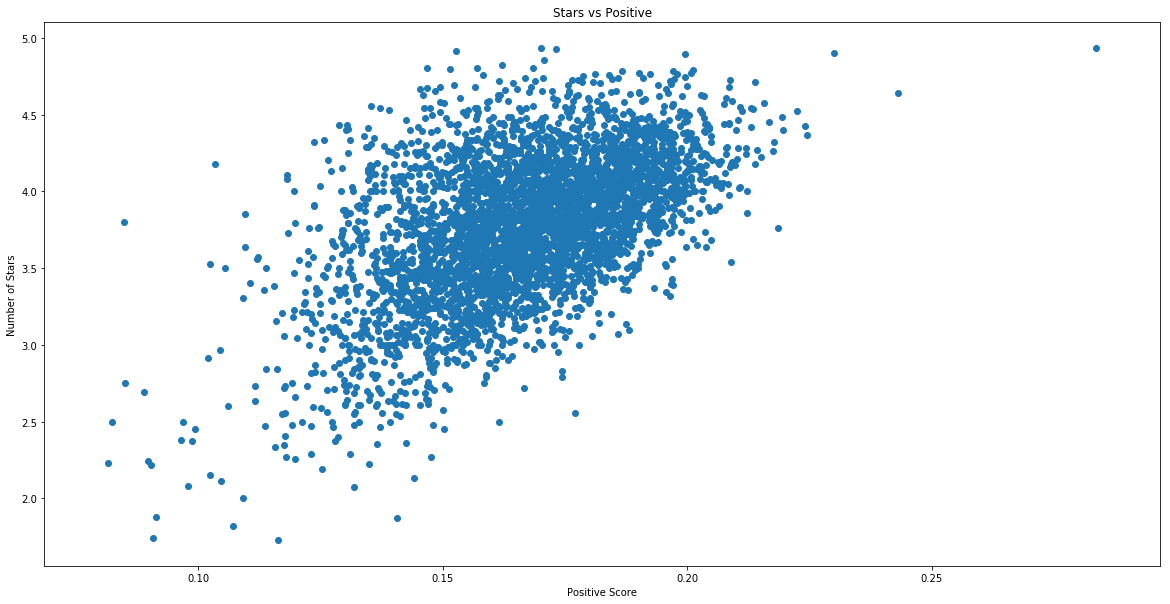

In [195]:
plt.figure(figsize=(20,10))
plt.scatter(avg_elite_reviews['Positive'], avg_elite_reviews['stars'])
plt.title('Stars vs Positive')
plt.xlabel('Positive Score')
plt.ylabel('Number of Stars')

Text(0,0.5,'Number of Stars')

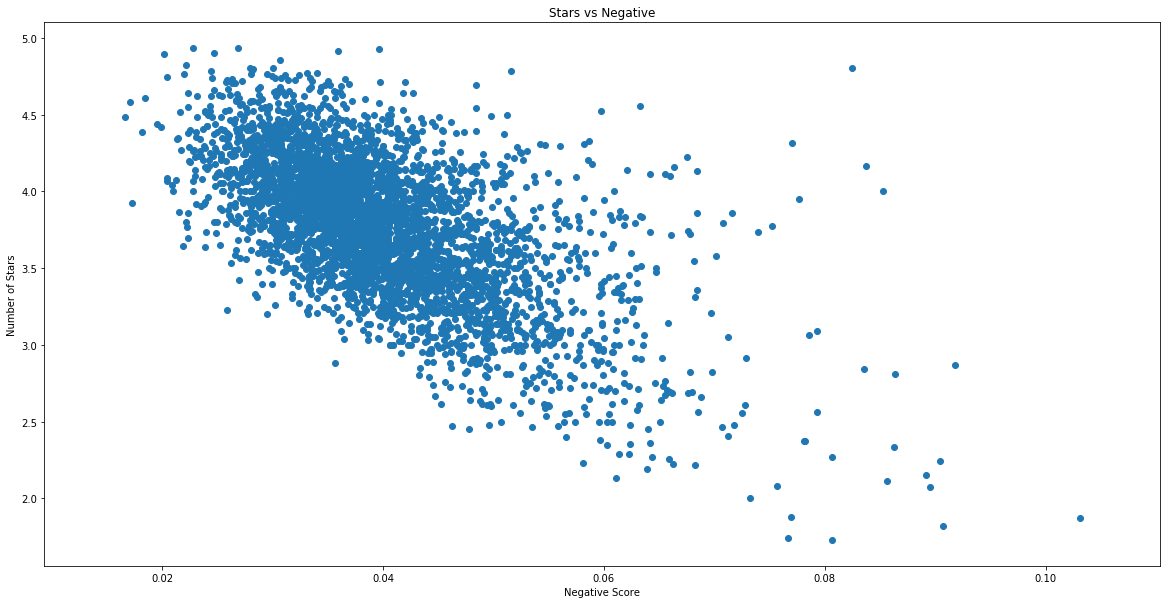

In [196]:
plt.figure(figsize=(20,10))
plt.scatter(avg_elite_reviews['Negative'], avg_elite_reviews['stars'])
plt.title('Stars vs Negative')
plt.xlabel('Negative Score')
plt.ylabel('Number of Stars')

Text(0,0.5,'Number of Stars')

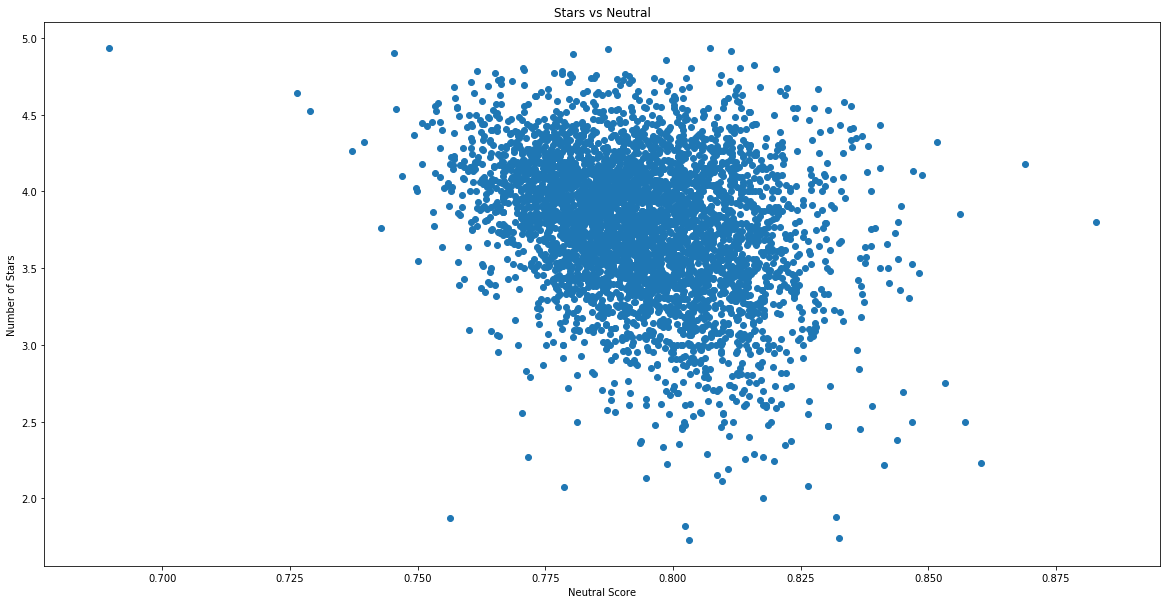

In [197]:
plt.figure(figsize=(20,10))
plt.scatter(avg_elite_reviews['Neutral'], avg_elite_reviews['stars'])
plt.title('Stars vs Neutral')
plt.xlabel('Neutral Score')
plt.ylabel('Number of Stars')

In [177]:
x_pos = avg_elite_reviews.iloc[:,1].values
x_neg = avg_elite_reviews.iloc[:,2].values
x_neu = avg_elite_reviews.iloc[:,3].values
x_comp = avg_elite_reviews.iloc[:,4].values
y = avg_elite_reviews.iloc[:,0].values

In [178]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [180]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.464e+04
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:13:56   Log-Likelihood:                -929.65
No. Observations:                2921   AIC:                             1867.
Df Residuals:                    2917   BIC:                             1891.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.1749      0.440     14.044      0.0

In [181]:
ypred = est2.predict(X_test)
r_squared = r2_score(y_test, ypred)
r_squared

0.48041272340262176

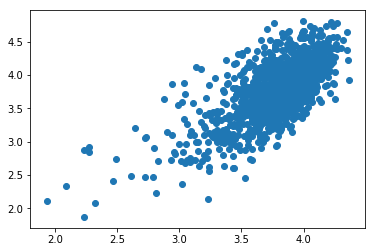

In [182]:
plt.scatter(ypred,y_test)

In [183]:
max(ypred)

4.3629495038646455

Remove compound from model

In [184]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [186]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.199e+05
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:14:09   Log-Likelihood:                -1004.5
No. Observations:                2921   AIC:                             2015.
Df Residuals:                    2918   BIC:                             2033.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.3031      0.294     35.020      0.0

In [187]:
ypred = est2.predict(X_test)
r_squared = r2_score(y_test, ypred)
r_squared

0.47158907962462815

Remove neutral from model

In [184]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

Remove neg from model

In [202]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [204]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.054e+05
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:20:43   Log-Likelihood:                -1190.9
No. Observations:                2921   AIC:                             2388.
Df Residuals:                    2918   BIC:                             2406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.5433      0.480     11.552      0.0

In [205]:
ypred = est2.predict(X_test)
r_squared = r2_score(y_test, ypred)
r_squared

0.344794179799757

In [190]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.480e+05
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:14:16   Log-Likelihood:                -1287.2
No. Observations:                2921   AIC:                             2578.
Df Residuals:                    2919   BIC:                             2590.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.2794      0.296     44.826      0.0

In [191]:
ypred = est2.predict(X_test)
r_squared = r2_score(y_test, ypred)
r_squared

0.31053995915449006

In [206]:
max(ypred)

4.513663569617064

In [207]:
max(y_train)

4.936708860759493

In [208]:
max(y_test)

4.807017543859649